In [72]:
import numpy  as np
import pandas as pd
import string
import warnings
%matplotlib notebook 
import matplotlib.dates as mdates
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.ticker as mticker
import statsmodels.api as sm
sns.set()
warnings.filterwarnings('ignore')

In [73]:
# Criando DataFrame com as informações do papel

url      = 'https://www.fundamentus.com.br/resultado.php'
balancos = pd.read_html(url, decimal=',', thousands='.')[0]
pd.set_option('display.max_rows', balancos.shape[0]+1)

# Tamanho do DataFrame

balancos.shape

(886, 21)

In [74]:
# Tratando Dados

for coluna in ['Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE', 'Cresc. Rec.5a']:
  balancos[coluna] = balancos[coluna].str.replace('.', '')
  balancos[coluna] = balancos[coluna].str.replace(',', '.')
  balancos[coluna] = balancos[coluna].str.rstrip('%').astype('float') / 100

In [75]:
# Filtro de Lucro < Media de todos  

media_lucro      = balancos.ix[:,'Patrim. Líq'].mean()
balancos        = balancos[balancos['Patrim. Líq'] > media_lucro] 

# Tamanho do DataFrame

balancos.shape

(166, 21)

In [76]:
# Filtro de Divida das Empresas < Media de todas as Dividas 

media_divida       = balancos.ix[:,'Dív.Brut/ Patrim.'].mean()
balancos           = balancos[balancos['Dív.Brut/ Patrim.'] < media_divida] 

# Tamanho do DataFrame

balancos.shape

(104, 21)

In [77]:
# Filtro de Lucro < Media de todos  

media_lucro      = balancos.ix[:,'EV/EBITDA'].mean()
balancos        = balancos[balancos['EV/EBITDA'] > media_lucro] 

# Tamanho do DataFrame

balancos.shape

(102, 21)

In [78]:
# Filtro de Lucro < Media de todos  

media_lucro      = balancos.ix[:,'Liq.2meses'].mean()
balancos        = balancos[balancos['Liq.2meses'] > media_lucro] 

# Tamanho do DataFrame

balancos.shape

(25, 21)

In [79]:
# Filtro de Lucro < Media de todos  

media_lucro      = balancos.ix[:,'EV/EBITDA'].mean()
balancos        = balancos[balancos['EV/EBITDA'] > media_lucro] 

# Tamanho do DataFrame

balancos.shape

(8, 21)

In [80]:
balancos

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
492,ITSA4,8.97,7.32,1.37,15.065,0.0970,1.118,19.83,403.45,-27.55,...,83.26,0.0373,2.1104,2.48,0.0030,0.1867,365118000.0,5.523200e+10,0.08,0.0188
700,HYPE3,31.37,17.04,2.28,6.020,0.0354,1.664,6.28,41.77,12.99,...,31.91,0.1441,0.3533,3.00,0.0508,0.1336,152725000.0,8.710100e+09,0.16,0.0347
767,MULT3,21.60,27.55,2.32,9.939,0.0217,1.355,33.22,16.61,-4.87,...,15.14,0.5985,0.3594,1.42,0.0922,0.0843,184891000.0,5.587670e+09,0.56,0.0522
779,B3SA3,40.59,30.79,3.29,12.709,0.0393,2.088,34.63,25.88,-20.11,...,18.42,0.4910,0.4126,1.30,0.1063,0.1069,827530000.0,2.538800e+10,0.17,0.3375
820,HAPV3,54.07,47.27,5.53,7.130,0.0076,3.226,96.60,38.70,-13.26,...,33.02,0.1843,0.1512,1.24,0.0948,0.1171,181180000.0,7.259600e+09,0.29,0.2101
824,WEGE3,39.10,50.82,9.41,6.148,0.0105,5.231,15.57,38.14,27.32,...,31.76,0.1612,0.1223,2.17,0.1878,0.1852,331428000.0,8.717250e+09,0.26,0.0910
845,GNDI3,57.54,82.01,5.45,4.129,0.0029,2.642,9.81,36.93,-43.19,...,27.07,0.1118,0.0504,2.45,0.1145,0.0665,323262000.0,6.370400e+09,0.34,0.2593
848,MGLU3,48.48,85.45,10.41,3.961,0.0021,3.980,16.28,85.50,128.07,...,53.16,0.0463,0.0464,1.60,0.1012,0.1219,791598000.0,7.564940e+09,0.11,0.2318


In [81]:
balancos.ix[:,'Papel']

492    ITSA4
700    HYPE3
767    MULT3
779    B3SA3
820    HAPV3
824    WEGE3
845    GNDI3
848    MGLU3
Name: Papel, dtype: object

In [129]:
def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()       
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

In [203]:
melhores_papeis = ['CCRO3.SA', 'HYPE3.SA', 'B3SA3.SA', 'HAPV3.SA', 'WEGE3.SA', 'MGLU3.SA', 
                   'GNDI3.SA', 'TOTS3.SA', 'BTOW3.SA', 'CNTO3.SA', 'BEEF3.SA', 
                   'HBOR3.SA', 'OIBR3.SA', 'CSAN3.SA', 'LAME4.SA', 'RADL3.SA', 'KLBN4.SA',
                   'WIZS3.SA', 'RADL3.SA', 'FLRY3.SA', 'ENEV3.SA', 'RENT3.SA', 'CSAN3.SA',
                   'EZTC3.SA', 'PRIO3.SA', 'LOGG3.SA', 'LOGN3.SA', 'JBSS3.SA', 'AMAR3.SA',
                   '^BVSP']

papeis = ['ABEV3.SA', 'AMAR3.SA', 'B3SA3.SA', 'BBDC4.SA', 'BBAS3.SA', 'BBSE3.SA', 'BEEF3.SA', 
          'BIDI4.SA', 'BPAN4.SA', 'BPAC11.SA', 'BRFS3.SA', 'BTOW3.SA', 'CCRO3.SA', 'CMIG4.SA', 'CNTO3.SA', 'COGN3.SA', 'CYRE3.SA', 
          'CSAN3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA', 'EVEN3.SA', 'EZTC3.SA', 
          'FLRY3.SA', 'GNDI3.SA','GRND3.SA', 'HAPV3.SA', 'HBOR3.SA', 'IGTA3.SA', 'ITUB4.SA', 'ITSA4.SA', 'JBSS3.SA', 
          'KLBN4.SA', 'LAME4.SA', 'LOGG3.SA', 'LINX3.SA', 'LOGN3.SA', 'LREN3.SA', 'MDIA3.SA', 'MGLU3.SA', 'MRVE3.SA', 'NEOE3.SA', 
          'ODPV3.SA', 'PCAR3.SA', 'PRIO3.SA', 'PARD3.SA', 'PSSA3.SA', 'RADL3.SA', 'RAIL3.SA', 'SANB11.SA', 'SHUL4.SA', 
          'SQIA3.SA', 'STBP3.SA', 'SUZB3.SA', 'TOTS3.SA', 'UNIP6.SA','VIVT4.SA', 'WEGE3.SA', 'WIZS3.SA', 'YDUQ3.SA',
          '^BVSP']

# Definicao do periodo de analise

today      = dt.date.today()
E_Day      = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(20)
S_Day      = day_before.day; S_Month = day_before.month; S_Year = day_before.year

#stock_data = yahoo(papeis,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
stock_data = yahoo(melhores_papeis,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
stocks_volume = stock_data['Volume']
stock_data.head()

[*********************100%***********************]  28 of 28 completed


Adj Close                                                       \
            AMAR3.SA   B3SA3.SA BEEF3.SA   BTOW3.SA   CCRO3.SA   CNTO3.SA   
Date                                                                        
2020-04-06      4.01  37.209999     9.00  53.840000  11.760825  23.010000   
2020-04-07      4.40  38.500000     8.96  57.500000  11.848739  25.200001   
2020-04-08      4.75  39.310001     8.71  61.389999  12.112477  25.620001   
2020-04-09      5.22  39.009998     8.63  57.730000  12.512971  25.620001   
2020-04-13      5.25  39.340000     9.12  58.299999  12.500000  24.500000   

                                                        ...   Volume  \
             CSAN3.SA   ENEV3.SA   EZTC3.SA   FLRY3.SA  ... LOGN3.SA   
Date                                                    ...            
2020-04-06  51.110001  32.709999  27.860001  20.000000  ...  2932600   
2020-04-07  52.500000  34.169998  29.200001  21.389999  ...  3771100   
2020-04-08  53.310001  33.599998  30.559999  21.639999  ...  1993000   
2020-04-09  51.570000  34.270000  30.200001  21.549999  ...  2136000   
2020-04-13  53.599998  34.770000  29.600000  21.340000  ...  1309600   

                                                                       \
            MGLU3.SA   OIBR3.SA  PRIO3.SA RADL3.SA  RENT3.SA TOTS3.SA   
Date                                                                    
2020-04-06  16251500   78541300  10299600  2048400  13828800  1359700   
2020-04-07  19648800  166994100   8151600  2714000  15036500  3473400   
2020-04-08  15821300   92514900   8288400  1602100  15164300  2180300   
2020-04-09  12969900  128557100   9012600  2100200  14493800  3637800   
2020-04-13   8456100   54041000   5533600  1574300   9189900  1487200   

                                        
           WEGE3.SA WIZS3.SA     ^BVSP  
Date                                    
2020-04-06  5498000   466200   9685400  
2020-04-07  8688400  1259900  11286500  
2020-04-08  7315700   446000  10206300  
2020-04-09  6340000   958700  10748700  
2020-04-13  3679200   776900   7651300  

[5 rows x 168 columns]

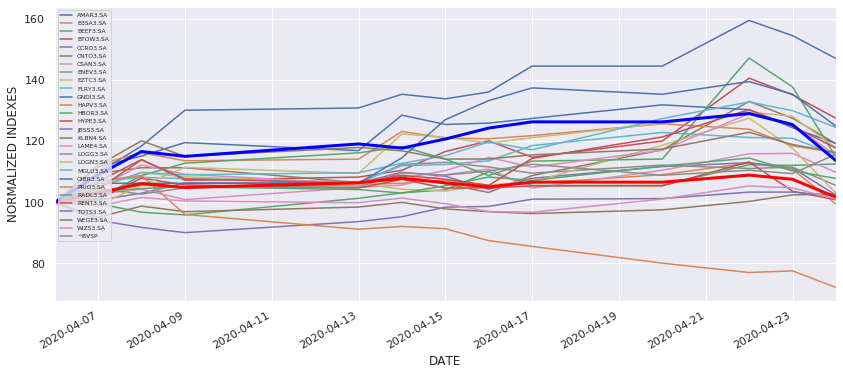

In [204]:
close = stock_data['Adj Close']
datanorm=close/close.iloc[0]*100
datanorm.plot(figsize=(14,6))
plt.xlabel('DATE')
plt.ylabel('NORMALIZED INDEXES')
plt.plot(datanorm['^BVSP'], color='red', linewidth=3)
plt.plot(datanorm['TOTS3.SA'], color='blue', linewidth=3)
plt.legend(loc=2, prop={'size': 6})
plt.show()

Text(0.5, 1, 'Correlação entre os ativos')

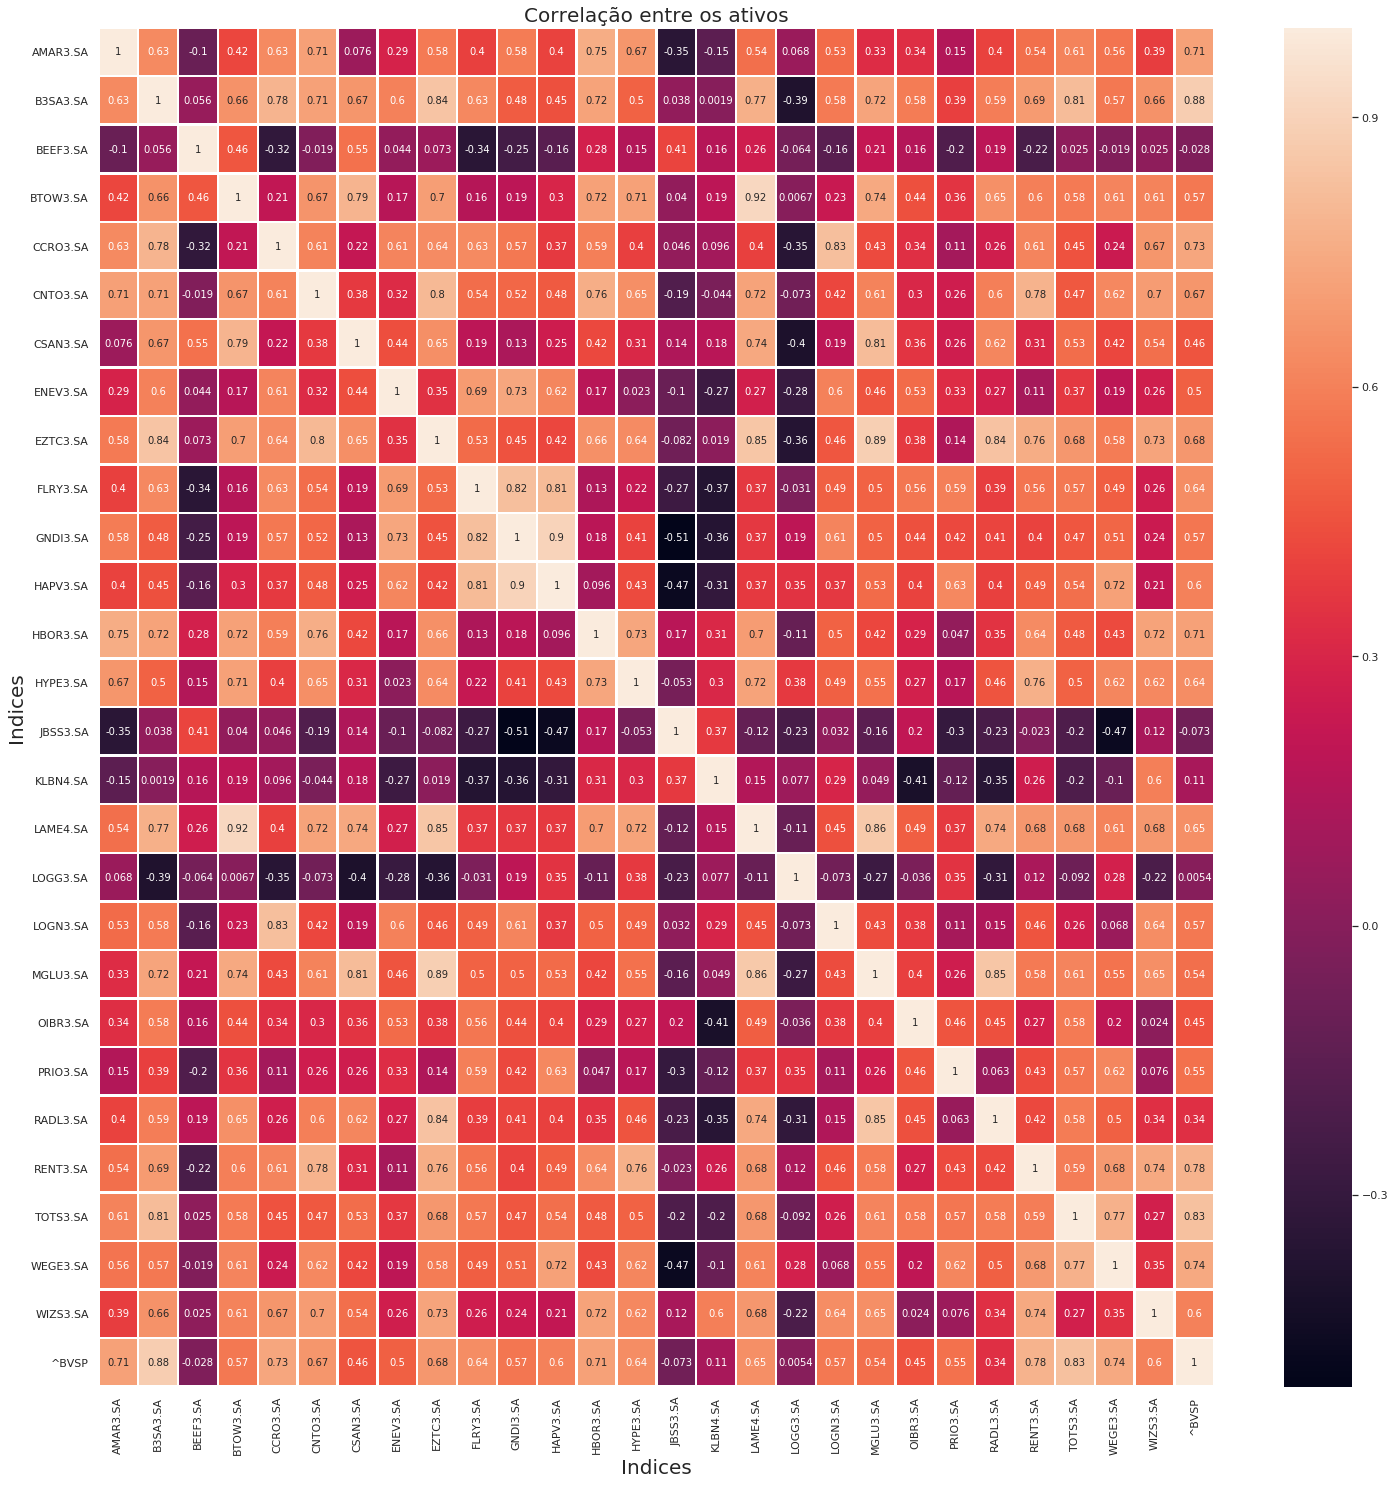

In [205]:
# Calcula retornos
log_return = np.log(close / close.shift(1))
return_a = log_return.mean() * 250

#Plota o as correlacoes por mapa de calor
%matplotlib inline 
market_corr = close.pct_change().iloc[1:].corr()
fig         = plt.subplots(figsize=(25,25))
ax2         = plt.subplot(1,1,1)  
sns.heatmap(market_corr, annot=True, linewidths=1.5, ax=ax2)

ax2.set_ylabel("Indices",fontsize=20)  
ax2.set_xlabel("Indices",fontsize=20)  
ax2.set_title("Correlação entre os ativos",fontsize=20)  

In [206]:
corr_means = []
for i in range(len(melhores_papeis)):
    corr_means.append(market_corr[melhores_papeis[i]].mean())

# intialise data of lists. 
data = {'Nome':melhores_papeis, 'Media de Correlacao':corr_means} 
  
# Create DataFrame 
market_corr_mean = pd.DataFrame(data)

menores_corr = market_corr_mean.sort_values('Media de Correlacao')

cov = log_return.cov()*250             #covariância dos dados
var_m = log_return['^BVSP'].var()*250  #variância do mercado
print(len(melhores_papeis))

30


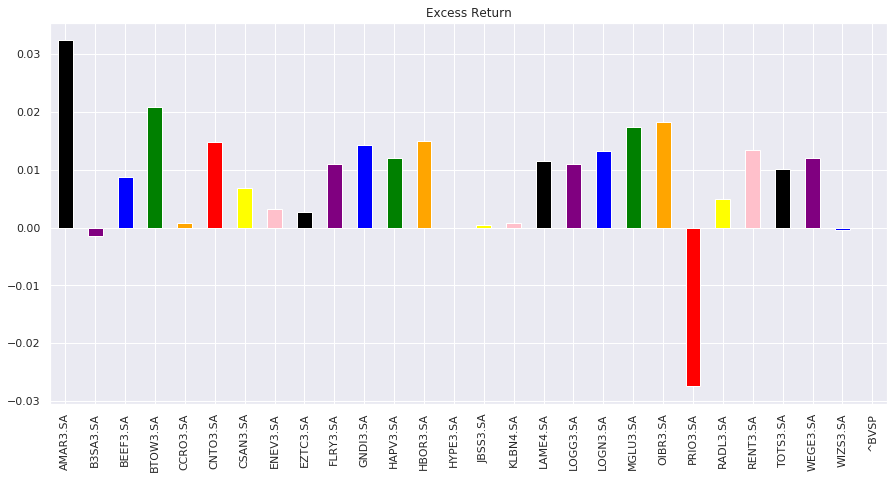

In [207]:
# Calculando Sharpe

stock_returns  = close.pct_change()
bvsp_return    = close['^BVSP'].pct_change()
excess_returns = stock_returns.sub(bvsp_return,axis=0)
avg_excess     = excess_returns.mean()
avg_excess.plot.bar(title='Excess Return', color=['black','purple','blue','green','orange','red', 'yellow','pink'], figsize=(15,7))

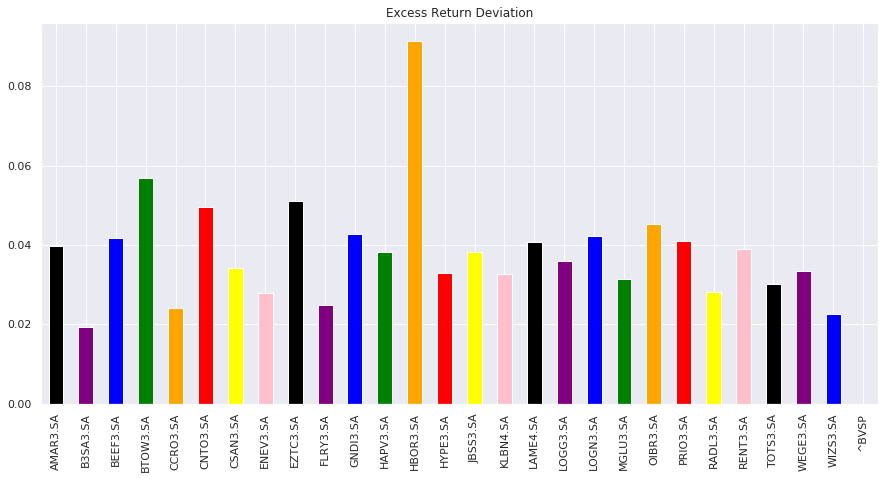

In [208]:
std_excess_return = excess_returns.std()
std_excess_return.plot.bar(title='Excess Return Deviation', figsize=(15,7),  color=['black','purple','blue','green','orange','red', 'yellow','pink'])

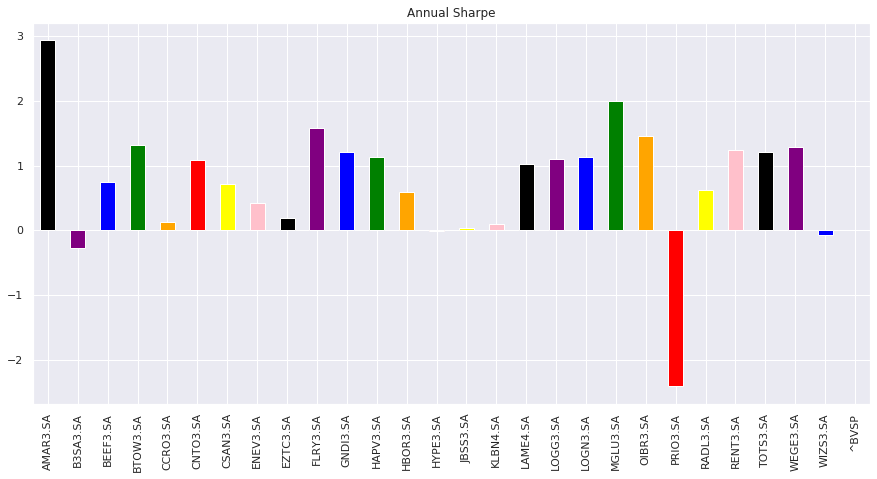

In [209]:
std_excess_return = excess_returns.std()
daily_sharpe_ratio = avg_excess.div(std_excess_return)
ann = np.sqrt(len(close['^BVSP']))
annual_sharpe = daily_sharpe_ratio.mul(ann)
annual_sharpe.plot.bar(title='Annual Sharpe', color=['black','purple','blue','green','orange','red', 'yellow','pink'], figsize=(15,7))

In [210]:
std_excess_return.mean()

0.037002012201461446

In [211]:
data = {'Retorno':return_a, 'Sharpe':annual_sharpe, 'E. Retorno':avg_excess}
market_info = pd.DataFrame(data)
pandas.set_option('display.max_rows', market_info.shape[0]+1)

# Markowitz

In [61]:
# Definicao do periodo de analise

today      = dt.date.today()
E_Day      = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(250)
S_Day      = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stock_data = yahoo(melhores_papeis,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
stocks_volume = stock_data['Volume']
stock_data.head()

[*********************100%***********************]  29 of 29 completed


Adj Close                                                         \
             B3SA3.SA   BTOW3.SA   CCRO3.SA   CNTO3.SA   CSAN3.SA   ENEV3.SA   
Date                                                                           
2019-08-16  43.464901  41.958199  14.633253  17.799999  49.590000  26.170000   
2019-08-19  44.441639  41.760502  14.566652  17.700001  49.599998  25.790001   
2019-08-20  44.695591  43.045399  15.223150  17.420000  48.740002  25.540001   
2019-08-21  44.754200  43.490200  15.508583  18.000000  49.400002  25.950001   
2019-08-22  44.412338  42.561100  15.261209  18.350000  49.150002  25.469999   

                                                       ...     Volume  \
             FLRY3.SA   GNDI3.SA  GRND3.SA   HAPV3.SA  ...   RAPT4.SA   
Date                                                   ...              
2019-08-16  22.986092  47.237053  7.303094  48.887009  ...  2127900.0   
2019-08-19  22.654091  47.077606  7.293198  47.629913  ...  3139800.0   
2019-08-20  23.152090  47.834991  7.273407  48.677490  ...  3312300.0   
2019-08-21  23.640324  48.881382  7.451531  49.874725  ...  2166600.0   
2019-08-22  23.943031  50.077255  7.362469  49.864746  ...  2196600.0   

                                                                               \
             RENT3.SA   SAPR4.SA   SUZB3.SA   TOTS3.SA    VALE3.SA   VIVT4.SA   
Date                                                                            
2019-08-16  3676050.0  2220900.0  5841100.0  1924900.0  19541100.0  1625100.0   
2019-08-19  3507315.0  1699200.0  4899300.0   947000.0  27533700.0  1055000.0   
2019-08-20  4588395.0  1175400.0  8911200.0   851700.0  16865100.0  1652200.0   
2019-08-21  3711120.0  1326300.0  8989400.0  1084700.0  16171800.0  1058000.0   
2019-08-22  2729685.0  1173300.0  8541300.0   725900.0  12254400.0  1029900.0   

                                              
              VVAR3.SA   WEGE3.SA      ^BVSP  
Date                                          
2019-08-16  66811400.0  3530100.0  5483400.0  
2019-08-19  55458700.0  2754800.0  4924000.0  
2019-08-20  75498000.0  2819200.0  5235200.0  
2019-08-21  36021500.0  2923000.0  5969700.0  
2019-08-22  20433100.0  1993200.0  4495500.0  

[5 rows x 174 columns]

<none>

In [ ]:
close = stock_data['Adj Close']
# Calcula retornos
log_return = np.log(close / close.shift(1))
return_a = log_return.mean() * 250

np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(stock_data['Adj Close'].columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(11))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_return.mean() * weights * 250))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*250, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

print('Maior Sharpe: {}'.format(sharpe_arr.max()))
print('Maior Retorno: {}'.format(ret_arr.max()))
print('Indice no Array: {}'.format(sharpe_arr.argmax()))

In [ ]:
# print(all_weights[4644,:]) #printa pesos do portifolio com maior sharpe
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

In [ ]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_return.mean() * weights) * 250
    vol = np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*250, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

import scipy

cons        = ({'type':'eq', 'fun':check_sum})
bounds      = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))
init_guess  = [0.0909,0.0909,0.0909,0.0909,0.0909,0.0909,0.0909,0.0909,0.0909,0.0909,0.0909]
opt_results = scipy.optimize.minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
print(opt_results)

In [ ]:
get_ret_vol_sr(opt_results.x)

# Dados Banco Central

In [82]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

In [83]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [84]:
ipca = consulta_bc(433)

In [85]:
igpm = consulta_bc(189)

<IPython.core.display.Javascript object>


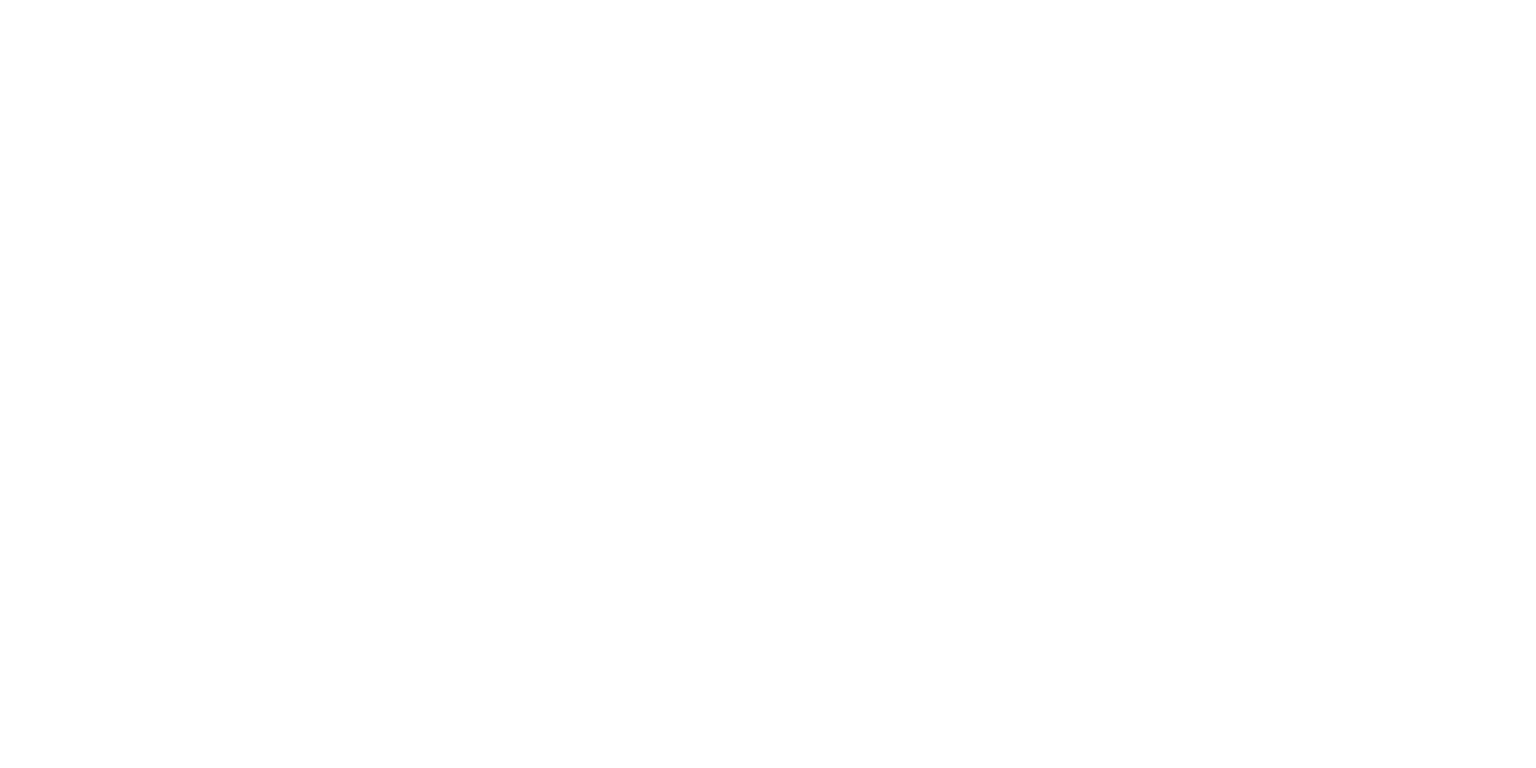

<IPython.core.display.Javascript object>


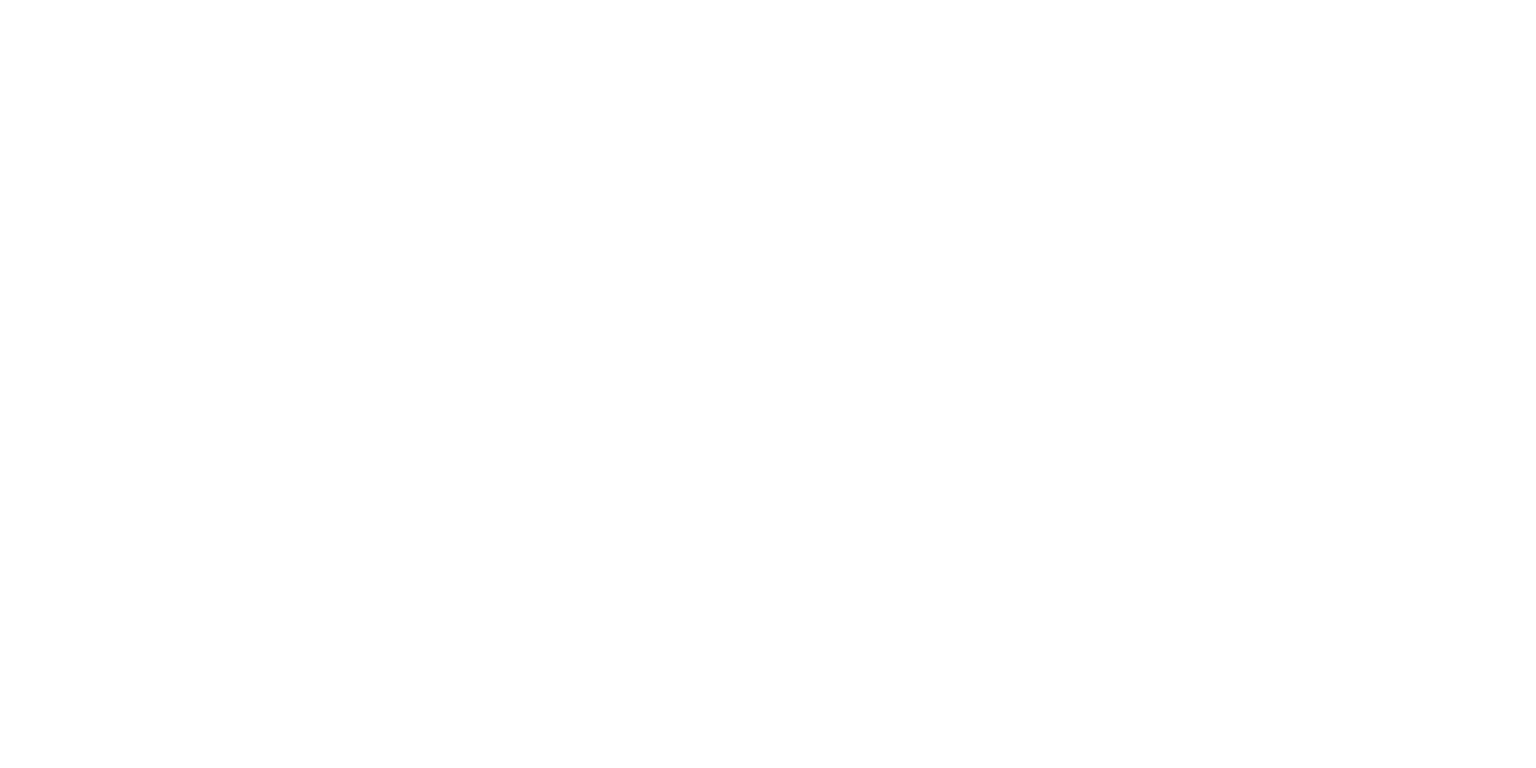

In [87]:
selic_meta = consulta_bc(432)
selic_meta.plot()

<IPython.core.display.Javascript object>


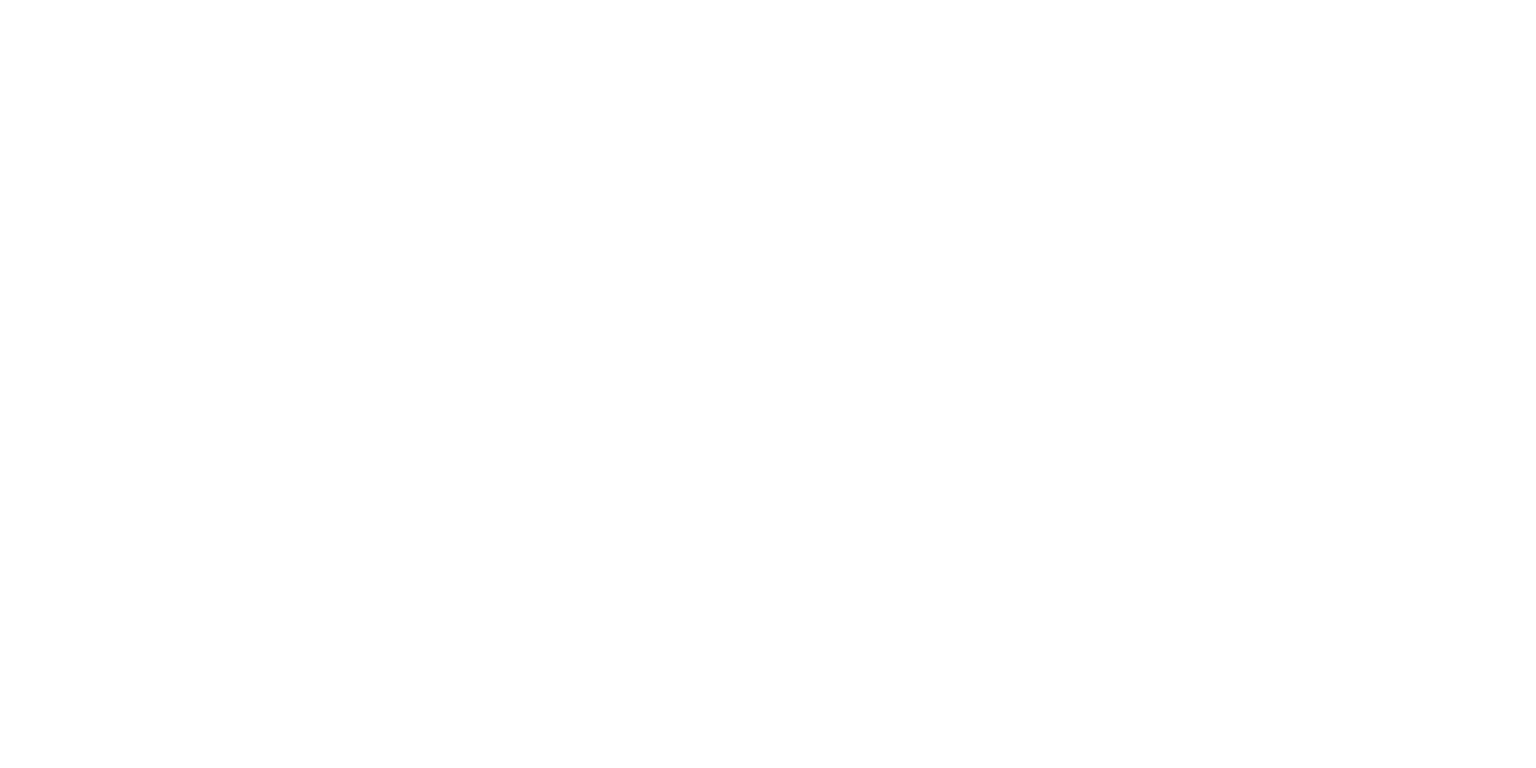

<IPython.core.display.Javascript object>


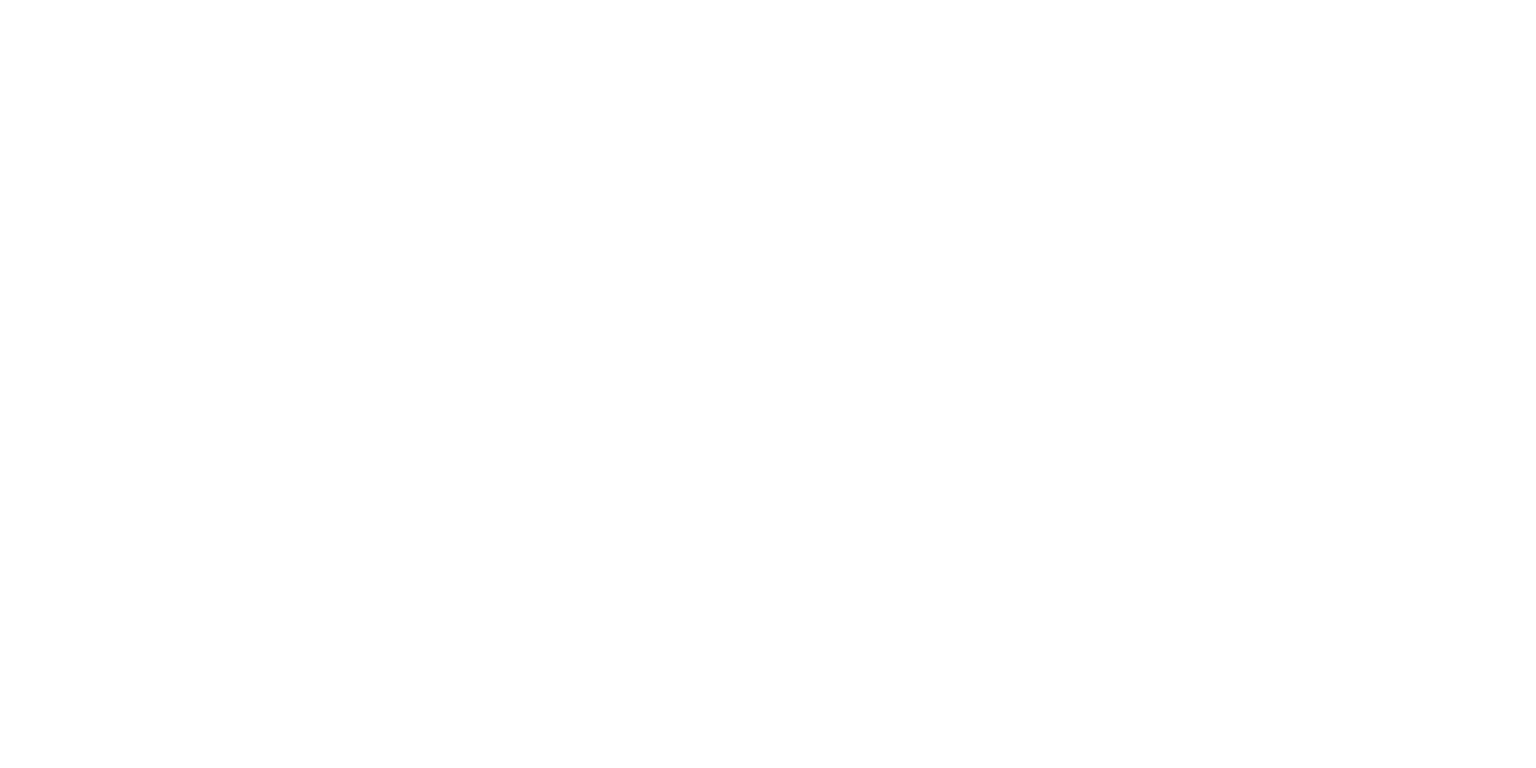

In [88]:
reservas_internacionais = consulta_bc(13621)
reservas_internacionais.plot()

In [90]:
# Definicao do periodo de analise

today      = dt.date.today()
E_Day      = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(5000)
S_Day      = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stock_data = yahoo(['^BVSP'],S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
ibov = stock_data['Adj Close']
ibov_retorno = ibov.pct_change()
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-08-14,36950.0,37184.0,36490.0,36557.0,36557.0,0
2006-08-15,36559.0,37417.0,36559.0,37296.0,37296.0,0
2006-08-16,37296.0,37697.0,37210.0,37678.0,37678.0,0
2006-08-17,37451.0,38022.0,37402.0,37559.0,37559.0,0
2006-08-18,37559.0,37589.0,37178.0,37552.0,37552.0,0


In [92]:
data_inicio = '2006-08-14'
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1

In [94]:
cdi = consulta_bc(12)
cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

<IPython.core.display.Javascript object>


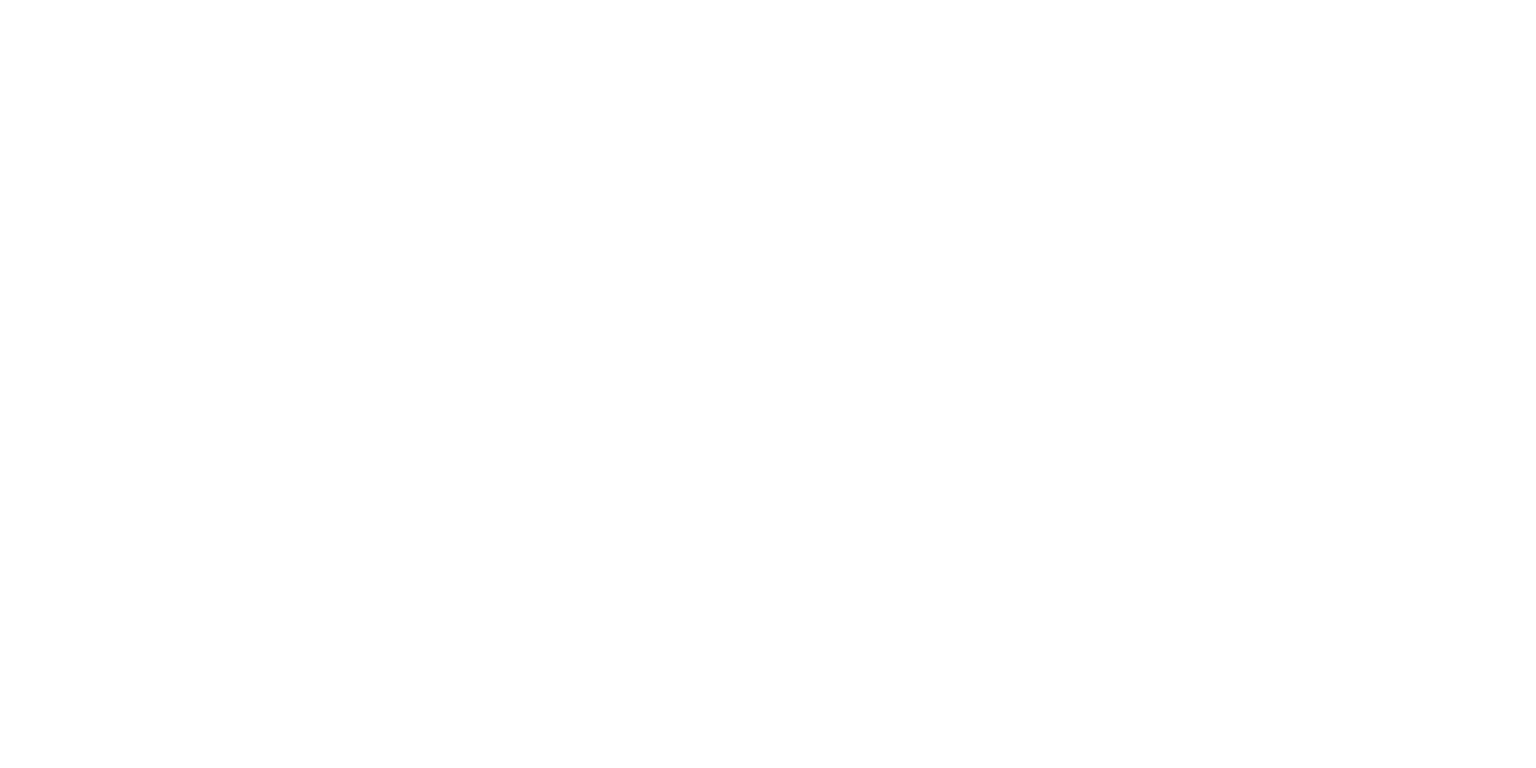

<IPython.core.display.Javascript object>


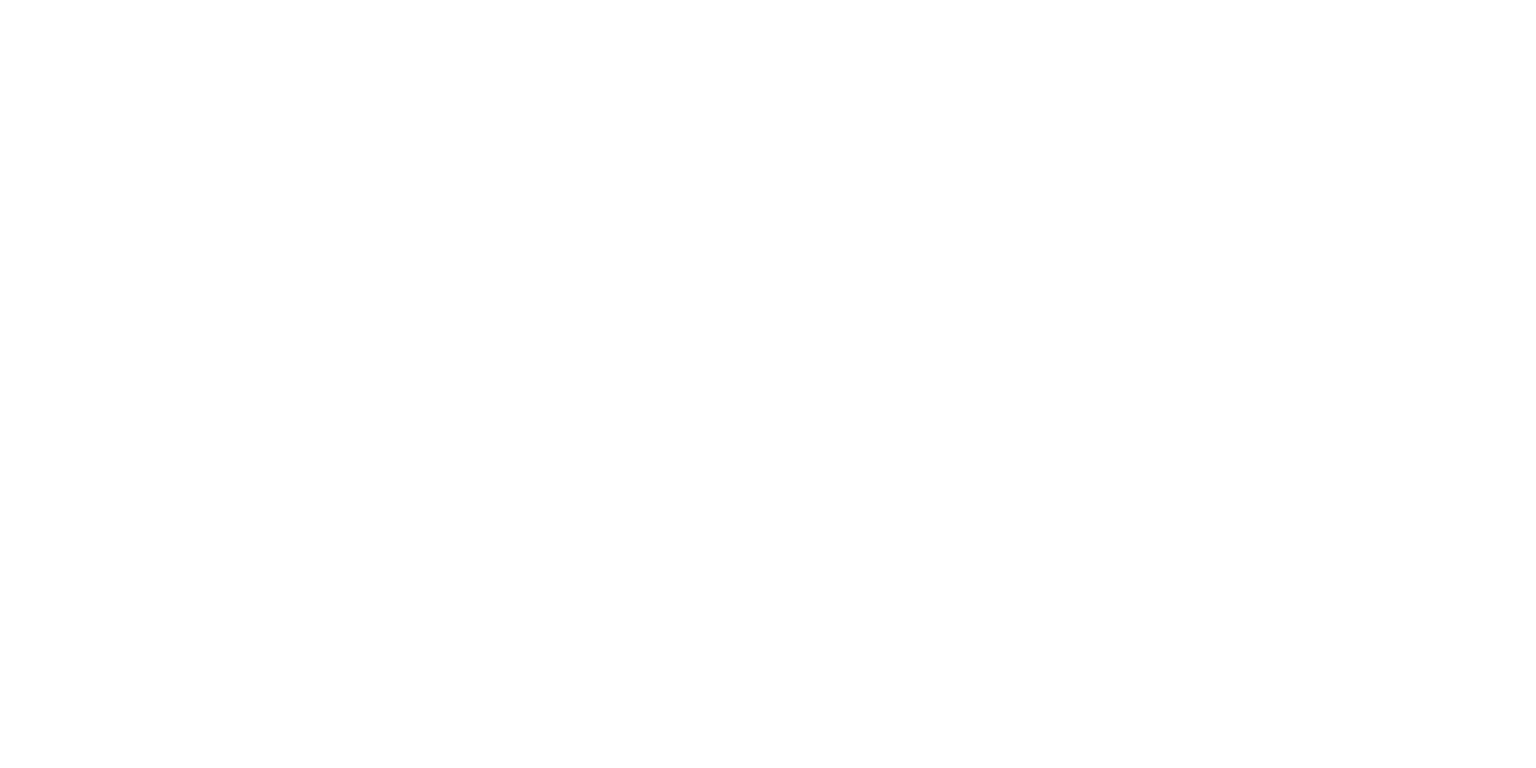

In [95]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(cdi_acumulado);